# Classification ascendante hiérarchique

## Clustering Ascendant Hiérarchique
Le CAH est une méthode de partitionnement des données d'apprentissage non supervisé.

À partir d'un ensemble de données représentées par n points, son but est de répartir ces points dans un certain nombre de clusters non-défini au préalable.

Le clustering est dit ascendant car il part d'une situation où tous les individus forment chacun un cluster puis sont rassemblés en clusters de plus en plus grands.

L'algorithme suit la démarche récursive suivante :

- S'il y a plus d'un cluster, calculer la distance entre tous les points du dataset
- Mettre chaque objet dans son propre cluster
- Fusionner les deux clusters les plus "proches"
- Calculer les distances entre le nouveau cluster et les autres
- Répéter les deux dernières opérations jusqu'à obtenir un seul cluster

### Comment est mesurée la distance ou l'éloignement entre deux clusters ?

Les principales métriques utilisées pour calculer la distance entre deux clusters sont :

- $\textbf{La distance minimale (single linkage)}$ : il s'agit de la plus petite distance mesurée entre deux points de clusters différents.
- $\textbf{La distance maximale (complete linkage)}$ : il s'agit de la plus grande distance mesurée entre deux points de clusters différents.
- $\textbf{La distance moyenne (average linkage)}$ : il s'agit de la moyenne des distances entre chaque point du premier cluster et chaque point du second.

# Cas pretique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/fromage.txt', sep='\t',index_col=0)
df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4)
cluster.fit(df)
labels = cluster.labels_
print(labels)

[1 2 0 1 1 0 2 2 0 0 2 0 0 2 1 3 3 1 1 0 3 2 2 2 1 0 2 0 3]


## Dendrogramme

En python, il est possible de construire un dendrogramme de la manière suivante :

- Effectuer un regroupement hiérarchique ou agglomératif des données (dataset) en utilisant la fonction linkage du sous-module *scipy.cluster.hierarchy*.

En effet comme expliqué précédemment, l'algorithme CAH sélectionne chaque observation comme un cluster indépendant et fusionne les 2 clusters les plus proches en un seul cluster. Les méthodes permettant de déterminer si deux clusters sont proches dépendent des paramètres de linkage. La fonction linkage permet d'entrainer un algorithme CAH en spécifiant ces paramètres, de la façon suivante :
$$
Z = linkage(dataset, method = 'ward', metric = 'euclidean')
$$

- Tracer le regroupement hiérarchique sous forme d'un dendrogramme, à l'aide de la fonction dendrogram du package comme suit :
$$dendrogram(Z, labels = dataset.index, leaf_rotation = 90., color_threshold = 0)$$

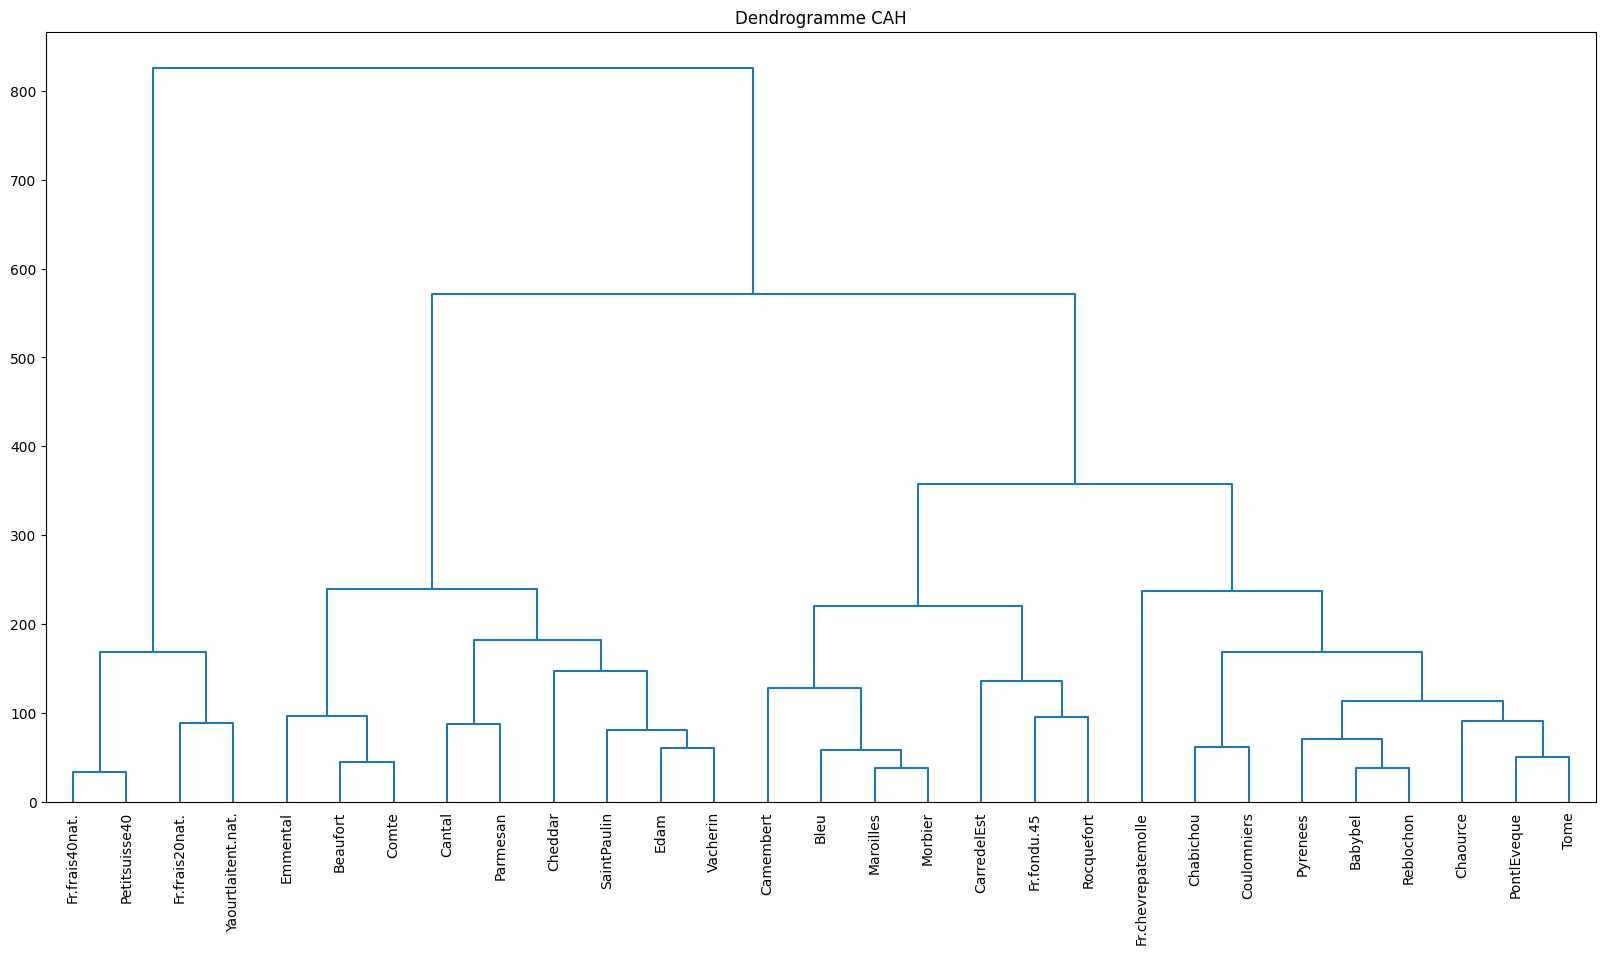

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 10))

Z = linkage(df, method = 'ward', metric = 'euclidean')

plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()  

### Choix de cluster selon dendro

Normalement le nombre de cluster optimal est le bloc ou distance vertical est le plus grand ici c'est 2.

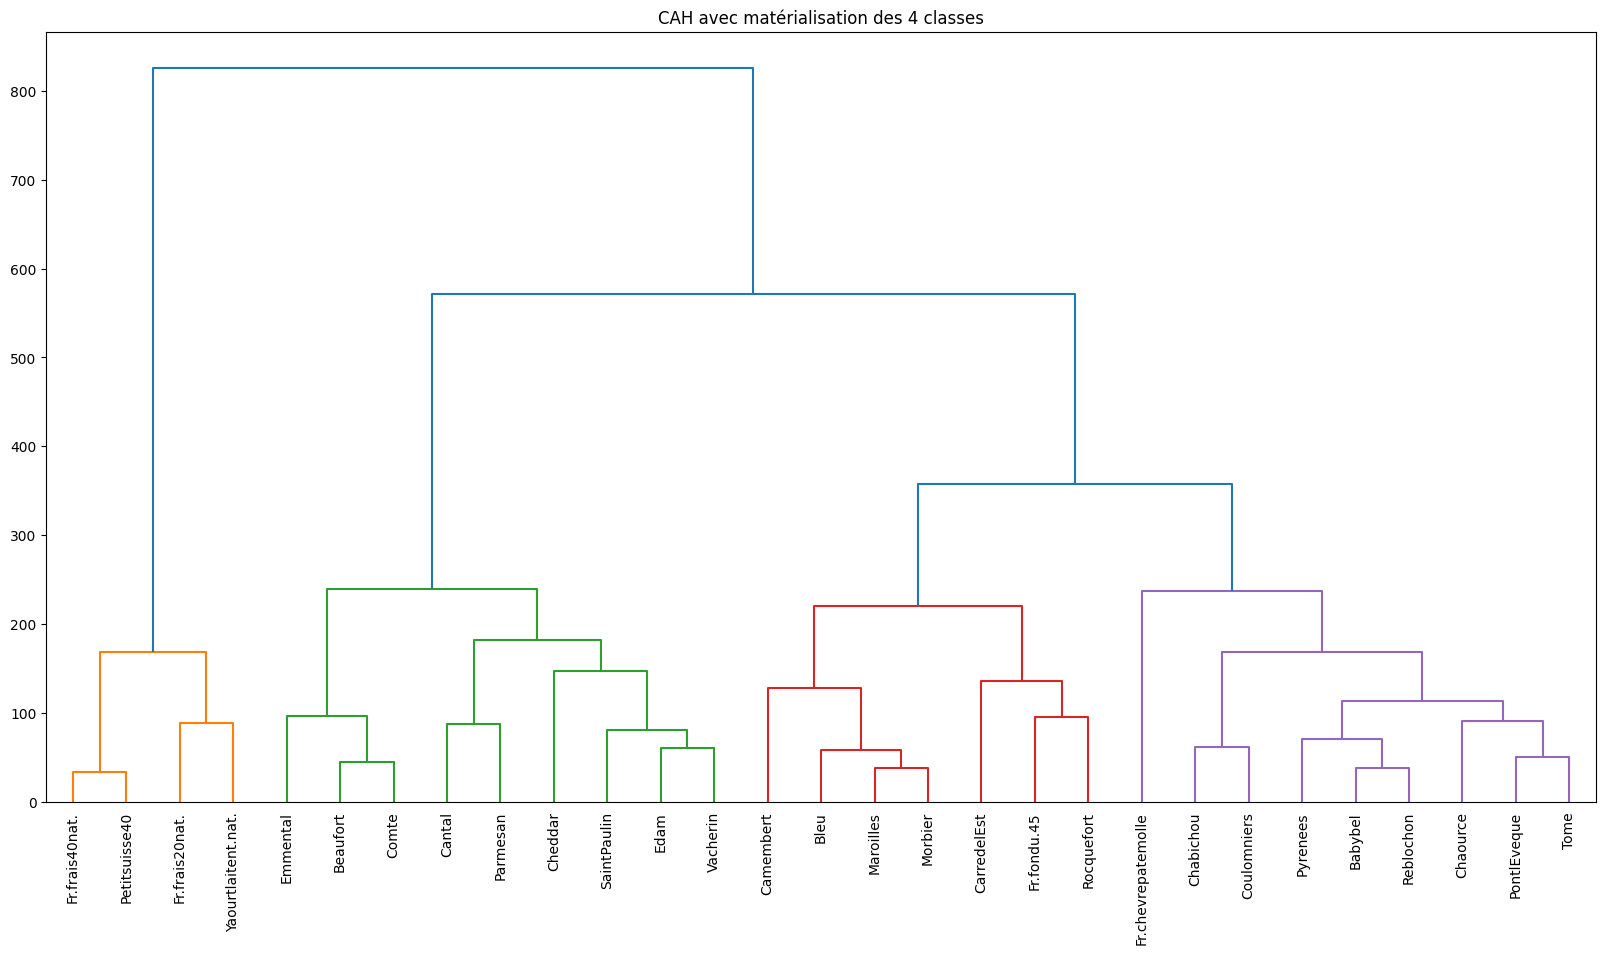

In [12]:
plt.figure(figsize=(20, 10))

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 290)
plt.show()

le coefficient de silhouette permet de mesurer la qualité de l'apprentissage. Pour une observation ou une instance de la base de données, le coefficient de silhouette est donné par la formule suivante :
$$
𝑠𝑖=\frac{𝑏_𝑖−𝑎_𝑖}{𝑚𝑎𝑥(𝑎_𝑖,𝑏_𝑖)}
$$ 
- 𝑎_𝑖 :
  correspond à la distance moyenne de l'observation  𝑖
  aux autres observations du cluster.
- b_i :
  correspond à la distance moyenne de l'observation  𝑖
  aux observations du cluster voisin le plus proche.
- Pour un cluster, le coefficient de silhouette est égal à la moyenne des coefficients des objets du cluster.
- Le partitionnement correspond à la moyenne des coefficients de tous les objets. Il est donc compris entre -1 et 1, et est d'autant plus proche de 1 que l'assignation de  𝑖
  à son cluster est satisfaisante.

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score(df, labels, metric='sqeuclidean')

0.4841389058187828

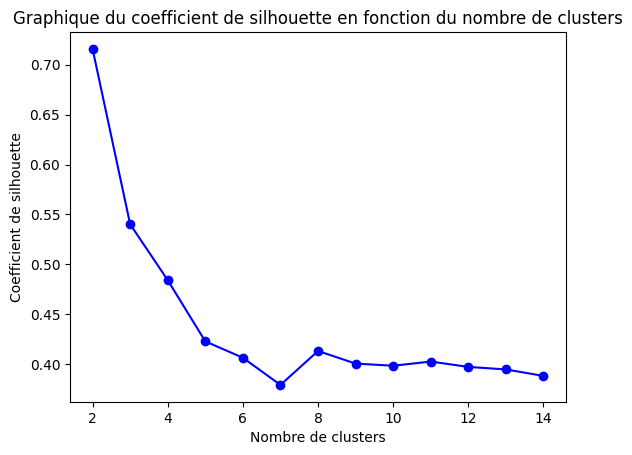

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

s_scores = []

for n_clusters in range_n_clusters :
    
    cluster = AgglomerativeClustering(n_clusters = n_clusters)
    cluster.fit(df)

    labels = cluster.labels_

    s_score = silhouette_score(df, labels, metric='sqeuclidean')
    s_scores.append(s_score)


plt.plot(range_n_clusters, s_scores, 'bo-')
plt.title('Graphique du coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

donc, cluster = 2 est optimal